[*********************100%%**********************]  1 of 1 completed


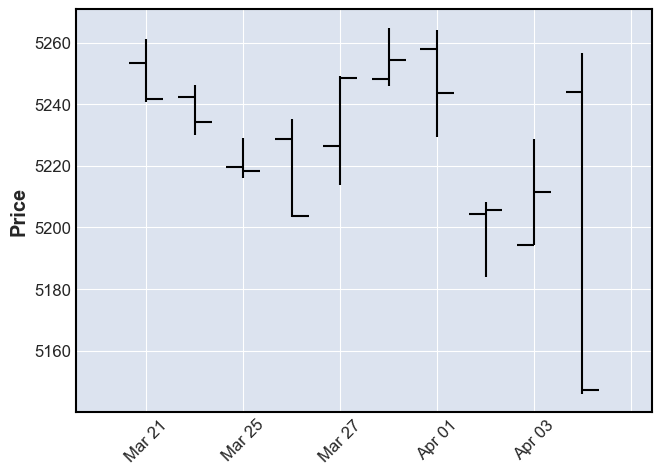

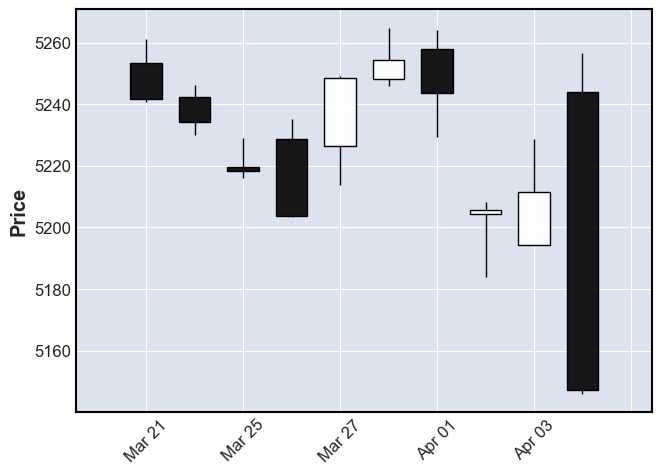

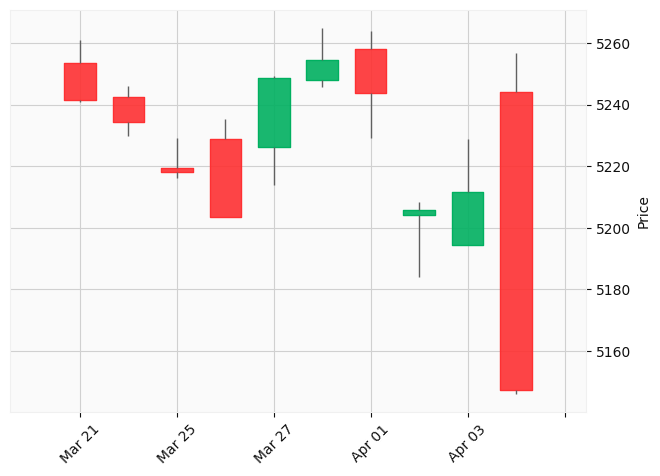

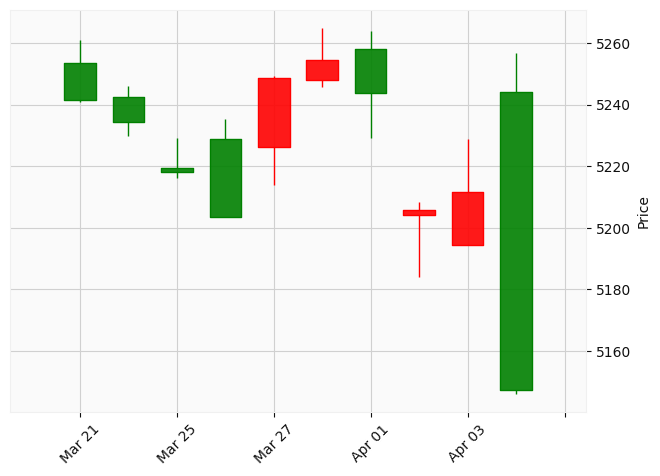

In [1]:

"""

繪製金融圖表

https://pypi.org/project/mplfinance/

pip install mplfinance
"""

# 載入函數工具檔
import pandas as pd
import mplfinance as mpf
# 以下為自訂函數「getDataYF」「getDataFM」使用
import os
import yfinance as yf

def getDataYF(prod):
    # 備份文件的資料夾
    folder_name = "data"
    # 檢查資料夾是否存在
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # 1. 定義備份檔案名稱
    bakfile = os.path.join(folder_name, f"yf_{prod}.csv")
    # 2. 檢視是否有歷史資料(本地端)
    if os.path.exists(bakfile):
        yfdata = pd.read_csv(bakfile)
        yfdata["Date"] = pd.to_datetime(yfdata["Date"], format="%Y-%m-%d")
        yfdata.set_index("Date", inplace=True)
    else:
        # 最大範圍
        yfdata = yf.download(prod, period="max")
        # 也可以指定起迄日期
        # yfdata = yf.download(str(prod), start='2020-01-01', end='2024-03-31')
        yfdata.columns = [i.lower() for i in yfdata.columns]
        # 上網下載後 存到本地端
        yfdata.to_csv(bakfile)
    return yfdata


def getDataFM(prod):
    # 備份文件的資料夾
    folder_name = "data"
    # 檢查資料夾是否存在
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # 1. 定義備份檔案名稱
    bakfile = os.path.join(folder_name, f"{prod}.csv")
    # 2. 檢視是否有歷史資料(本地端)
    if os.path.exists(bakfile):
        yfdata = pd.read_csv(bakfile)
        yfdata["Date"] = pd.to_datetime(yfdata["Date"], format="%Y-%m-%d")
        yfdata.set_index("Date", inplace=True)
    else:
        yfdata = yf.download(f'{prod}.TW', period="max", progress=False)
        if yfdata.shape[0] == 0:
            yfdata = yf.download(f'{prod}.TWO', period="max", progress=False)
        yfdata.columns = [i.lower() for i in yfdata.columns]
        # 上網下載後 存到本地端
        yfdata.to_csv(bakfile)
    return yfdata

# 取得資料
prod = "^GSPC"
data = getDataYF(prod)
data = data.iloc[-10:]

# 繪製圖表
mpf.plot(data)

# 繪製K線圖
mpf.plot(data, type="candle")

# 查看樣式
mpf.available_styles()

# 調整樣式
mpf.plot(data, type="candle", style="yahoo")

# 修改K線顏色
mcolor = mpf.make_marketcolors(up="r", down="g", inherit=True)
mstyle = mpf.make_mpf_style(base_mpf_style="yahoo", marketcolors=mcolor)
mpf.plot(data, type="candle", style=mstyle)
